<a href="https://colab.research.google.com/github/us107/Book-Rating-predictions/blob/main/RatingsPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Ratings.csv')

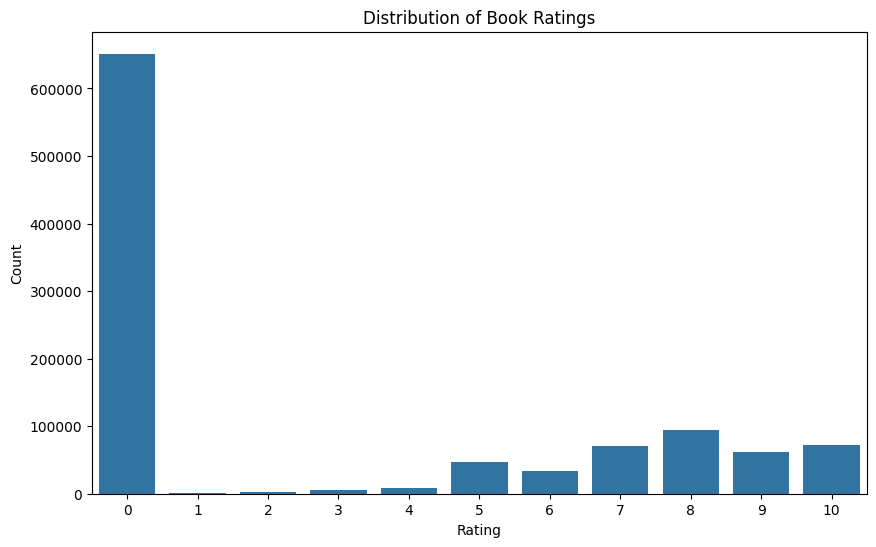

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Book-Rating')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [5]:
print('\
Rating Statistics:')
print(df['Book-Rating'].describe())

Rating Statistics:
count    1.048575e+06
mean     2.879907e+00
std      3.857870e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64


In [6]:
user_activity = df['User-ID'].value_counts()
book_activity = df['ISBN'].value_counts()

print('\
User Activity Statistics:')
print('Average ratings per user:', round(len(df) / df['User-ID'].nunique(), 2))
print('Median ratings per user:', user_activity.median())
print('Max ratings by a single user:', user_activity.max())


User Activity Statistics:
Average ratings per user: 10.98
Median ratings per user: 1.0
Max ratings by a single user: 13602


In [7]:
print('\
Book Activity Statistics:')
print('Average ratings per book:', round(len(df) / df['ISBN'].nunique(), 2))
print('Median ratings per book:', book_activity.median())
print('Max ratings for a single book:', book_activity.max())

Book Activity Statistics:
Average ratings per book: 3.25
Median ratings per book: 1.0
Max ratings for a single book: 2264


In [8]:
# Check for missing values
print('\
Missing Values:')
print(df.isnull().sum())

Missing Values:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder


In [10]:
le = LabelEncoder()
df['ISBN_encoded'] = le.fit_transform(df['ISBN'])

In [11]:
min_user_ratings = 5 #setting a threshold value for user rating per user here
min_book_ratings = 5

In [12]:
user_activity = df['User-ID'].value_counts()
active_users = user_activity[user_activity >= min_user_ratings].index
df_filtered = df[df['User-ID'].isin(active_users)]

In [13]:
book_activity = df_filtered['ISBN'].value_counts()
active_books = book_activity[book_activity >= min_book_ratings].index
df_filtered = df_filtered[df_filtered['ISBN'].isin(active_books)]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_filtered['Book-Rating-Normalized'] = scaler.fit_transform(df_filtered[['Book-Rating']])


In [15]:
print(df_filtered.head())
print('\
Remaining Users:', df_filtered['User-ID'].nunique())
print('Remaining Books:', df_filtered['ISBN'].nunique())
print('Remaining Ratings:', len(df_filtered))

    User-ID        ISBN  Book-Rating  ISBN_encoded  Book-Rating-Normalized
10   276746   425115801            0        146639                     0.0
11   276746   449006522            0        161017                     0.0
12   276746   553561618            0        186998                     0.0
13   276746  055356451X            0         10620                     0.0
14   276746   786013990            0        249438                     0.0
Remaining Users: 19816
Remaining Books: 36116
Remaining Ratings: 541204


In [16]:
!pip install scikit-surprise


In [17]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy


In [18]:
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(df_filtered[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [19]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


In [20]:
svd_model = SVD()
svd_model.fit(trainset)

In [21]:
predictions = svd_model.test(testset)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print('SVD Model Evaluation:')
print('RMSE:', rmse)
print('MAE:', mae)

RMSE: 3.5301
MAE:  2.8043
SVD Model Evaluation:
RMSE: 3.530132775986631
MAE: 2.8043256278385478


# Using neural network


In [22]:
# Installing TensorFlow
%pip install tensorflow==2.13.0

print('TensorFlow installed successfully.')

TensorFlow installed successfully.


In [30]:
import tensorflow as tf
from tensorflow.keras import mixed_precision


In [32]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.13.0
    Uninstalling tensorflow-2.13.0:
      Su